In [1]:
import os
import glob
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers import TimeDistributed 
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import sounddevice as sd
from PIL import Image, ImageTk 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)

    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)

    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)
    all_features = np.hstack([mfccs_mean, chroma_mean, spectral_contrast_mean])

    return all_features

In [3]:
data = []
labels = []
for folder_name in os.listdir('datasetss'):
    folder_path = os.path.join('datasetss', folder_name)
    for file_path in glob.glob(os.path.join(folder_path, '*.wav')):
        print(file_path)
        features = extract_features(file_path)
        data.append(features)
        labels.append(folder_name)

datasetss\angry\00-00-00-angel-netral.wav
datasetss\angry\03-01-05-01-01-01-01.wav
datasetss\angry\03-01-05-01-01-01-02.wav
datasetss\angry\03-01-05-01-01-01-03.wav
datasetss\angry\03-01-05-01-01-01-04.wav
datasetss\angry\03-01-05-01-01-01-05.wav
datasetss\angry\03-01-05-01-01-01-06.wav
datasetss\angry\03-01-05-01-01-01-07.wav
datasetss\angry\03-01-05-01-01-01-08.wav
datasetss\angry\03-01-05-01-01-01-09.wav
datasetss\angry\03-01-05-01-01-01-10.wav
datasetss\angry\03-01-05-01-01-01-11.wav
datasetss\angry\03-01-05-01-01-01-12.wav
datasetss\angry\03-01-05-01-01-01-13.wav
datasetss\angry\03-01-05-01-01-01-14.wav
datasetss\angry\03-01-05-01-01-01-15.wav
datasetss\angry\03-01-05-01-01-01-16.wav
datasetss\angry\03-01-05-01-01-01-17.wav
datasetss\angry\03-01-05-01-01-01-18.wav
datasetss\angry\03-01-05-01-01-01-19.wav
datasetss\angry\03-01-05-01-01-01-20.wav
datasetss\angry\03-01-05-01-01-01-21.wav
datasetss\angry\03-01-05-01-01-01-22.wav
datasetss\angry\03-01-05-01-01-01-23.wav
datasetss\angry

In [4]:
import pandas as pd

df = pd.DataFrame(data)
df['label'] = labels

df.to_csv('extracted_features_testDatasets.csv', index=False)

Epoch 1/300
87/87 [==============================] - 8s 26ms/step - loss: 1.7502 - accuracy: 0.1956 - val_loss: 1.6483 - val_accuracy: 0.1916
Epoch 2/300
87/87 [==============================] - 1s 12ms/step - loss: 1.6639 - accuracy: 0.2165 - val_loss: 1.5932 - val_accuracy: 0.3012
Epoch 3/300
87/87 [==============================] - 1s 12ms/step - loss: 1.6367 - accuracy: 0.2187 - val_loss: 1.5324 - val_accuracy: 0.4035
Epoch 4/300
87/87 [==============================] - 1s 13ms/step - loss: 1.6065 - accuracy: 0.2309 - val_loss: 1.5326 - val_accuracy: 0.3602
Epoch 5/300
87/87 [==============================] - 1s 10ms/step - loss: 1.5769 - accuracy: 0.2558 - val_loss: 1.4994 - val_accuracy: 0.3746
Epoch 6/300
87/87 [==============================] - 1s 8ms/step - loss: 1.5371 - accuracy: 0.2831 - val_loss: 1.4418 - val_accuracy: 0.3847
Epoch 7/300
87/87 [==============================] - 1s 9ms/step - loss: 1.4931 - accuracy: 0.3210 - val_loss: 1.3957 - val_accuracy: 0.4323
Epoch 8/

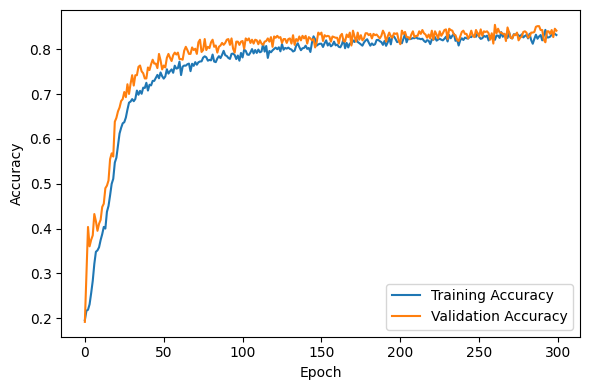

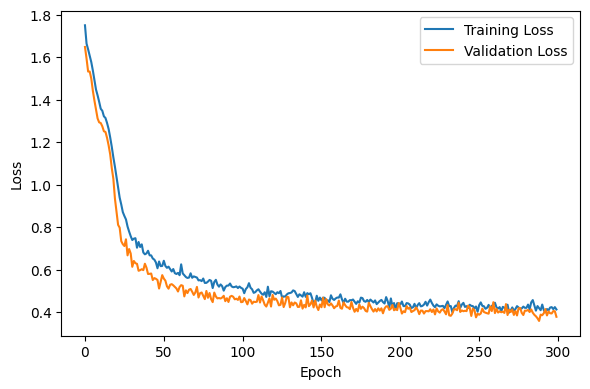

22/22 [==============================] - 0s 8ms/step - loss: 0.3780 - accuracy: 0.8415
Test loss: 0.37798571586608887
Test accuracy: 0.8414985537528992


In [5]:
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

X_train = np.array(X_train)[:, np.newaxis, :]
X_test = np.array(X_test)[:, np.newaxis, :]

model = Sequential()
model.add(TimeDistributed(Dense(256, activation='relu'), input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

# Extract training and validation accuracy and loss from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('accuracy_plot.png')  # Simpan gambar akurasi

# Plot and save loss
plt.figure(figsize=(6, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('loss_plot.png') 
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

22/22 [==============================] - 1s 4ms/step


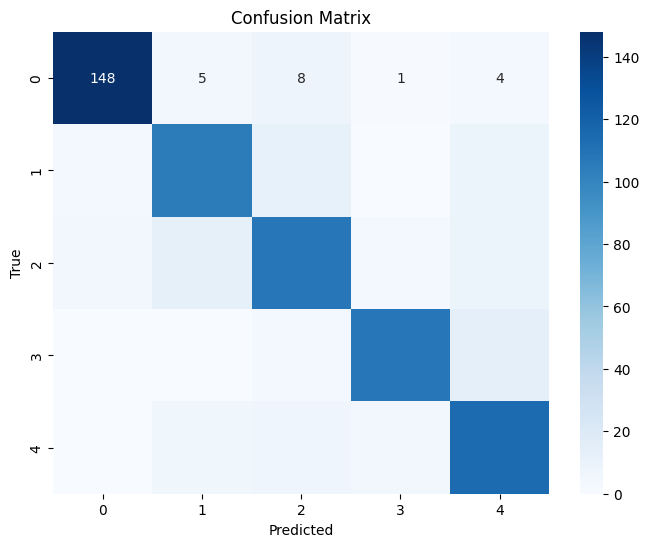


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       166
           1       0.81      0.81      0.81       130
           2       0.78      0.78      0.78       139
           3       0.92      0.86      0.89       126
           4       0.76      0.86      0.81       133

    accuracy                           0.84       694
   macro avg       0.84      0.84      0.84       694
weighted avg       0.85      0.84      0.84       694

Confusion Matrix and Classification Report saved as PNG and text files.


In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

classification_rep = classification_report(y_test, y_pred_classes)
with open('classification_report.txt', 'w') as report_file:
    report_file.write(classification_rep)

print("\nClassification Report:")
print(classification_rep)

print("Confusion Matrix and Classification Report saved as PNG and text files.")

In [7]:
model.save("model_super_terbaik.h5");

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:

def predict_emotion(audio_file):
    best_model = tf.keras.models.load_model('model_super_terbaik.h5')
    features = extract_features(audio_file)
    features = features[np.newaxis, np.newaxis, :]  
    print("Features shape:", features.shape)
    print("Features:", features)

    predicted_probabilities = best_model.predict(features)
    print("Predicted probabilities shape:", predicted_probabilities.shape)
    print("Predicted probabilities:", predicted_probabilities)

    predicted_label_index = np.argmax(predicted_probabilities)
    print("Predicted label index:", predicted_label_index)

    predicted_emotion = label_encoder.classes_[predicted_label_index]
    print("Predicted emotion:", predicted_emotion)


    # Emotion mapping for TESS dataset
    emotion_mapping = {
        'angry': 'ANGRY',
        # 'disgust': 'DISGUST',
        'fear': 'FEAR',
        'happy': 'HAPPY',
        'neutral': 'NEUTRAL',
        'sad': 'SAD',
    }

    
    recognizable_emotion = emotion_mapping.get(predicted_emotion)
    return recognizable_emotion


In [9]:
# import tensorflow as tf
# import librosa
# import numpy as np

# # Fungsi untuk memuat model dari file .h5
# def load_model(model_path):
#     model = tf.keras.models.load_model(model_path)
#     return model

# # Fungsi untuk memproses data audio dan melakukan prediksi
# def predict_audio_class(model, audio_path):
#     # Muat audio menggunakan librosa
#     audio_data, _ = librosa.load(audio_path, sr=44100)

#     # Lakukan ekstraksi fitur audio (misalnya, MFCC)
#     mfccs = librosa.feature.mfcc(y=audio_data, sr=44100, n_mfcc=13)

#     # Normalisasi data
#     mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

#     # Reshape data agar sesuai dengan input model
#     mfccs = mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1])

#     # Lakukan prediksi
#     predictions = model.predict(mfccs)

#     # Interpretasikan hasil prediksi (misalnya, ambil kelas dengan nilai tertinggi)
#     predicted_class = np.argmax(predictions)

#     return predicted_class

# # Path ke model .h5
# model_path = 'model_terbaik.h5'

# # Path ke file audio yang akan diprediksi
# audio_path = 'samples/sample 1.wav'

# # Memuat model
# model = load_model(model_path)

# # Melakukan prediksi
# predicted_class = predict_audio_class(model, audio_path)

# # Output hasil prediksi
# print(f'Hasil prediksi kelas audio: {predicted_class}')


In [10]:
import sounddevice as sd
from scipy.io import wavfile

class EmotionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Emotion Prediction")
        self.root.configure(bg='#2C3333')

        self.emotion_to_emoji = {
            "HAPPY": "emoji/Happy.jpg",
            "SAD": "emoji/Sad.jpg",
            "ANGRY": "emoji/Angry.jpg",
            "NEUTRAL": "emoji/Neutral.jpg",
            "FEAR": "emoji/Fear.jpg",
            # "DISGUST": "emoji/Disgust.jpg"
        }

        self.emoji_image = None
        self.prediction_history = []

        self.show_home_page()

    def show_home_page(self):
        self.clear_window()

        label = tk.Label(self.root, text="Emotion Recognition",
                         font=('Poppins bold', 16))
        label.pack(pady=18)

        audio_button = tk.Button(self.root, text="Prediksi suara", font=(
            'Poppins', 8), command=self.show_audio_page,
            bg='#33691e', fg="#FBFBFB", width=14, height=1, pady=2)
        audio_button.pack(pady=0)
        
        record_audio_button = tk.Button(self.root, text="Rekam suara", font=('Poppins', 8), command=self.show_record_audio_page, bg='#FFA000', fg="#000000", width=14, height=1, pady=2)
        record_audio_button.pack(pady=12)

        history_button = tk.Button(self.root, text="Riwayat", font=(
            'Poppins', 8), command=self.show_history_page, bg='#283593', fg="#FBFBFB", width=14, height=1, pady=2)
        history_button.pack(pady=0)


    def show_record_audio_page(self):
        self.clear_window()

        canvas = tk.Canvas(self.root, width=500, height=500, bg='#FFFFFF')
        canvas.pack()

        title_label = tk.Label(self.root, text='Audio Recording', font=('Poppins bold', 26), bg="#FFFFFF", fg="#395B64")
        canvas.create_window(250, 50, window=title_label)

        file_name_label = tk.Label(self.root, text="File Name (.wav):", font=('Poppins', 10))
        canvas.create_window(250, 120, window=file_name_label)

        self.file_name_entry = tk.Entry(self.root, font=('Poppins', 10))
        canvas.create_window(250, 150, window=self.file_name_entry)

        record_button = tk.Button(self.root, text="Record", font=('Poppins', 9), command=self.start_recording, bg='#E7F6F2', fg="#395B64", width=14, height=1, pady=2)
        canvas.create_window(250, 200, window=record_button)

        back_button = tk.Button(self.root, text="Back to home", font=('Poppins', 9), command=self.show_home_page, bg='#E7F6F2', fg="#395B64", width=14, height=1, pady=2)
        canvas.create_window(250, 400, window=back_button)

    def start_recording(self):
        self.audio_buffer = []  # To store the audio data

        # Configure the audio recording parameters (adjust as needed)
        sample_rate = 44100  # Samples per second
        duration = 5  # Recording duration in seconds

        def audio_callback(indata, frames, time, status):
            if status:
                print(status, file=sys.stderr)
            if any(indata):
                self.audio_buffer.append(indata.copy())

        try:
            with sd.InputStream(callback=audio_callback, channels=1, samplerate=sample_rate):
                sd.sleep(int(duration * 1000))
        except Exception as e:
            print("Error during audio recording:", str(e))

        if hasattr(self, 'audio_buffer') and len(self.audio_buffer) > 0:
            file_name = self.file_name_entry.get()
            if not file_name:
                file_name = "recorded_audio.wav"

            # Save the audio data as a .wav file
            audio_data = np.concatenate(self.audio_buffer, axis=0)
            wavfile.write(file_name, sample_rate, audio_data)
            print("Audio recording saved as", file_name)


    def show_audio_page(self):
        self.clear_window()

        canvas = tk.Canvas(self.root, width=500, height=500, bg='#FFFFFF')
        canvas.pack()

        title_label = tk.Label(self.root, text='Speech Recognition', font=(
            'Poppins bold', 26), bg="#FFFFFF", fg="#395B64")
        canvas.create_window(250, 50, window=title_label)

        def upload_audio():
            file_path = filedialog.askopenfilename(
                filetypes=[("Audio Files", "*.wav")])
            if file_path:
                predicted_emotion = predict_emotion(file_path)
                emotion_label.config(text=predicted_emotion)

                self.prediction_history.append(
                    (os.path.basename(file_path), predicted_emotion))

                emoji_image_path = self.emotion_to_emoji.get(predicted_emotion)
                if emoji_image_path:
                    emoji_image = Image.open(emoji_image_path)
                    emoji_image = emoji_image.resize(
                        (100, 100), Image.ANTIALIAS)
                    self.emoji_image = ImageTk.PhotoImage(emoji_image)
                    emoji_label.config(image=self.emoji_image)

        upload_button = tk.Button(self.root, text='Upload Audio', font=(
            'Poppins', 9), command=upload_audio, bg='#E7F6F2', fg="#395B64", width=14, height=1, pady=2)
        canvas.create_window(250, 150, window=upload_button)

        emotion_label = tk.Label(
            self.root, text='PREDICTED EMOTION WILL BE DISPLAY HERE', bg="#FFFFFF", font=('Poppins', 11))
        canvas.create_window(250, 200, window=emotion_label)

        emoji_label = tk.Label(self.root, image=None, bg="#FFFFFF")
        canvas.create_window(250, 300, window=emoji_label)

        back_button = tk.Button(
            self.root, text="Back to home", font=('Poppins', 9), command=self.show_home_page, bg='#E7F6F2', fg="#395B64", width=14, height=1, pady=2)
        canvas.create_window(250, 400, window=back_button)

    def show_history_page(self):
        self.clear_window()

        canvas = tk.Canvas(self.root, width=500, height=500, bg='#FFFFFF')
        canvas.pack()

        label = tk.Label(self.root, text="Prediction History",
                         font=('Poppins bold', 16), bg="#FFFFFF", fg="#395B64")
        canvas.create_window(250, 50, window=label)

        if self.prediction_history:
            for index, (file_name, predicted_emotion) in enumerate(self.prediction_history, start=1):
                history_text = f"{index}. File: {file_name}, Emotion: {predicted_emotion}"
                history_label = tk.Label(self.root, text=history_text, font=('Poppins', 10),bg="#FFFFFF", fg="#395B64")
                canvas.create_window(250, 100 + index * 30,
                                     window=history_label)
        else:
            no_history_label = tk.Label(
                self.root, text="NO PREDICTION HISTORY AVAILABLE.", font=('Poppins', 10),bg="#FFFFFF", fg="#B2533E")
            canvas.create_window(250, 150, window=no_history_label)

        back_button = tk.Button(
            self.root, text="Back to home", font=('Poppins', 9), command=self.show_home_page, bg='#E7F6F2', fg="#395B64", width=14, height=1, pady=2)
        canvas.create_window(250, 400, window=back_button)

    def clear_window(self):
        for widget in self.root.winfo_children():
            widget.destroy()

if __name__ == "__main__":
    root = tk.Tk()
    app = EmotionApp(root)
    root.mainloop()

Features shape: (1, 1, 32)
Features: [[[-2.20646988e+02  1.00055145e+02 -6.41166925e+00  8.79983330e+00
   -7.77925348e+00 -1.25459642e+01 -2.82946229e+00  4.96371269e+00
   -1.72765656e+01  2.56822777e+01 -5.35987902e+00  6.46975994e+00
   -1.05608821e+00  2.06871569e-01  2.05340981e-01  2.56319910e-01
    2.87556350e-01  3.57370734e-01  3.97472650e-01  3.94917548e-01
    3.29004616e-01  3.74668092e-01  3.46189350e-01  3.31944019e-01
    2.86739945e-01  1.59667410e+01  1.84308505e+01  1.94538847e+01
    1.88784529e+01  1.85611681e+01  2.10742014e+01  4.56526826e+01]]]
1/1 [==============================] - 1s 1s/step
Predicted probabilities shape: (1, 5)
Predicted probabilities: [[0.00826431 0.25435275 0.735313   0.00086899 0.001201  ]]
Predicted label index: 2
Predicted emotion: happy


C:\Users\User\AppData\Local\Temp\ipykernel_13040\3512044784.py:119: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  (100, 100), Image.ANTIALIAS)


Features shape: (1, 1, 32)
Features: [[[-2.20646988e+02  1.00055145e+02 -6.41166925e+00  8.79983330e+00
   -7.77925348e+00 -1.25459642e+01 -2.82946229e+00  4.96371269e+00
   -1.72765656e+01  2.56822777e+01 -5.35987902e+00  6.46975994e+00
   -1.05608821e+00  2.06871569e-01  2.05340981e-01  2.56319910e-01
    2.87556350e-01  3.57370734e-01  3.97472650e-01  3.94917548e-01
    3.29004616e-01  3.74668092e-01  3.46189350e-01  3.31944019e-01
    2.86739945e-01  1.59667410e+01  1.84308505e+01  1.94538847e+01
    1.88784529e+01  1.85611681e+01  2.10742014e+01  4.56526826e+01]]]
1/1 [==============================] - 1s 1s/step
Predicted probabilities shape: (1, 5)
Predicted probabilities: [[0.00826431 0.25435275 0.735313   0.00086899 0.001201  ]]
Predicted label index: 2
Predicted emotion: happy
Features shape: (1, 1, 32)
Features: [[[-5.24464783e+02  1.06354439e+02 -4.69919586e+01  8.77099991e+00
    3.42604542e+00  9.75878334e+00 -1.62970428e+01  1.34324446e+01
   -2.41053543e+01  9.91630733e